In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report

In [2]:
from warnings import filterwarnings
filterwarnings("ignore")

### KNN - Baseline

In [3]:
folder_path = 'Output/5_Implementasi_Algoritma/KNN/Baseline/'
file_list = [os.path.join(folder_path, file) for file in os.listdir(folder_path)]
display(file_list)

['Output/5_Implementasi_Algoritma/KNN/Baseline/actual.csv',
 'Output/5_Implementasi_Algoritma/KNN/Baseline/result_k_05.csv',
 'Output/5_Implementasi_Algoritma/KNN/Baseline/result_k_10.csv',
 'Output/5_Implementasi_Algoritma/KNN/Baseline/result_k_15.csv',
 'Output/5_Implementasi_Algoritma/KNN/Baseline/result_k_20.csv',
 'Output/5_Implementasi_Algoritma/KNN/Baseline/result_k_25.csv',
 'Output/5_Implementasi_Algoritma/KNN/Baseline/result_k_30.csv',
 'Output/5_Implementasi_Algoritma/KNN/Baseline/result_k_35.csv',
 'Output/5_Implementasi_Algoritma/KNN/Baseline/result_k_40.csv',
 'Output/5_Implementasi_Algoritma/KNN/Baseline/result_k_45.csv',
 'Output/5_Implementasi_Algoritma/KNN/Baseline/result_k_50.csv']

In [4]:
df_knn = pd.concat([pd.read_csv(file) for file in file_list], axis=1)
display(df_knn)

,sentiment,k_5,k_10,k_15,k_20,k_25,k_30,k_35,k_40,k_45,k_50
0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,0,0
2,-1,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0
4,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
1868,0,0,0,0,0,0,0,0,0,0,0
1869,0,1,1,1,1,1,1,1,1,1,1
1870,1,1,0,0,0,0,0,0,0,0,0
1871,0,0,0,0,0,0,0,0,0,0,0


In [5]:
df_knn_accuracy = pd.DataFrame()
for column in df_knn.drop(columns=['sentiment']).columns.to_list():
  df_knn_accuracy[column] = pd.Series([accuracy_score(df_knn['sentiment'].to_list(), df_knn[column].to_list())])
display(df_knn_accuracy)

,k_5,k_10,k_15,k_20,k_25,k_30,k_35,k_40,k_45,k_50
0,0.661506,0.651895,0.642819,0.624666,0.628938,0.635878,0.625734,0.639082,0.638548,0.636946


In [6]:
k_max = df_knn_accuracy.iloc[:, 0:].idxmax(axis=1)
display(k_max)

0    k_5
dtype: object

In [7]:
print(classification_report(df_knn['sentiment'].to_list(), df_knn[str(k_max[0])].to_list()))

              precision    recall  f1-score   support

          -1       0.11      0.04      0.05       114
           0       0.70      0.81      0.75      1131
           1       0.61      0.51      0.56       628

    accuracy                           0.66      1873
   macro avg       0.47      0.45      0.45      1873
weighted avg       0.63      0.66      0.64      1873



### KNN - Oversampling

In [8]:
folder_path = 'Output/5_Implementasi_Algoritma/KNN/Oversampling/'
file_list = [os.path.join(folder_path, file) for file in os.listdir(folder_path)]
display(file_list)

['Output/5_Implementasi_Algoritma/KNN/Oversampling/actual.csv',
 'Output/5_Implementasi_Algoritma/KNN/Oversampling/result_k_05.csv',
 'Output/5_Implementasi_Algoritma/KNN/Oversampling/result_k_10.csv',
 'Output/5_Implementasi_Algoritma/KNN/Oversampling/result_k_15.csv',
 'Output/5_Implementasi_Algoritma/KNN/Oversampling/result_k_20.csv',
 'Output/5_Implementasi_Algoritma/KNN/Oversampling/result_k_25.csv',
 'Output/5_Implementasi_Algoritma/KNN/Oversampling/result_k_30.csv',
 'Output/5_Implementasi_Algoritma/KNN/Oversampling/result_k_35.csv',
 'Output/5_Implementasi_Algoritma/KNN/Oversampling/result_k_40.csv',
 'Output/5_Implementasi_Algoritma/KNN/Oversampling/result_k_45.csv',
 'Output/5_Implementasi_Algoritma/KNN/Oversampling/result_k_50.csv']

In [9]:
df_knn_oversampling = pd.concat([pd.read_csv(file) for file in file_list], axis=1)
display(df_knn_oversampling)

,sentiment,k_5,k_10,k_15,k_20,k_25,k_30,k_35,k_40,k_45,k_50
0,0,0,-1,-1,-1,-1,-1,-1,-1,-1,-1
1,1,1,1,1,1,1,1,1,1,1,1
2,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
3,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
4,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
3388,1,1,1,1,1,1,1,1,1,1,1
3389,1,1,1,1,1,1,1,1,1,1,1
3390,1,0,1,1,1,1,1,1,1,1,1
3391,1,1,1,1,1,1,1,1,1,1,1


In [10]:
df_knn_oversampling_accuracy = pd.DataFrame()
for column in df_knn_oversampling.drop(columns=['sentiment']).columns.to_list():
  df_knn_oversampling_accuracy[column] = pd.Series([accuracy_score(df_knn_oversampling['sentiment'].to_list(), df_knn_oversampling[column].to_list())])
display(df_knn_oversampling_accuracy)

,k_5,k_10,k_15,k_20,k_25,k_30,k_35,k_40,k_45,k_50
0,0.512231,0.493958,0.473033,0.465665,0.45977,0.453581,0.451223,0.444444,0.440908,0.43855


In [11]:
k_max = df_knn_oversampling_accuracy.iloc[:, 0:].idxmax(axis=1)
display(k_max)

0    k_5
dtype: object

In [12]:
print(classification_report(df_knn_oversampling['sentiment'].to_list(), df_knn_oversampling[str(k_max[0])].to_list()))

              precision    recall  f1-score   support

          -1       0.55      0.46      0.50      1131
           0       0.47      0.35      0.40      1131
           1       0.51      0.72      0.60      1131

    accuracy                           0.51      3393
   macro avg       0.51      0.51      0.50      3393
weighted avg       0.51      0.51      0.50      3393



### KNN - Undersampling

In [13]:
folder_path = 'Output/5_Implementasi_Algoritma/KNN/Undersampling/'
file_list = [os.path.join(folder_path, file) for file in os.listdir(folder_path)]
display(file_list)

['Output/5_Implementasi_Algoritma/KNN/Undersampling/actual.csv',
 'Output/5_Implementasi_Algoritma/KNN/Undersampling/result_k_05.csv',
 'Output/5_Implementasi_Algoritma/KNN/Undersampling/result_k_10.csv',
 'Output/5_Implementasi_Algoritma/KNN/Undersampling/result_k_15.csv',
 'Output/5_Implementasi_Algoritma/KNN/Undersampling/result_k_20.csv',
 'Output/5_Implementasi_Algoritma/KNN/Undersampling/result_k_25.csv',
 'Output/5_Implementasi_Algoritma/KNN/Undersampling/result_k_30.csv',
 'Output/5_Implementasi_Algoritma/KNN/Undersampling/result_k_35.csv',
 'Output/5_Implementasi_Algoritma/KNN/Undersampling/result_k_40.csv',
 'Output/5_Implementasi_Algoritma/KNN/Undersampling/result_k_45.csv',
 'Output/5_Implementasi_Algoritma/KNN/Undersampling/result_k_50.csv']

In [14]:
df_knn_undersampling = pd.concat([pd.read_csv(file) for file in file_list], axis=1)
display(df_knn_undersampling)

,sentiment,k_5,k_10,k_15,k_20,k_25,k_30,k_35,k_40,k_45,k_50
0,-1,0,0,0,0,0,0,0,0,0,0
1,-1,-1,-1,0,0,0,0,0,0,0,0
2,-1,0,0,0,0,0,0,0,0,0,0
3,-1,-1,0,0,0,0,0,0,0,0,0
4,-1,-1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
337,1,0,0,0,0,0,0,0,0,0,0
338,1,0,0,0,0,0,0,0,0,0,0
339,1,0,0,0,0,0,0,0,0,0,0
340,1,0,0,0,0,0,0,0,0,0,0


In [15]:
df_knn_undersampling_accuracy = pd.DataFrame()
for column in df_knn_undersampling.drop(columns=['sentiment']).columns.to_list():
  df_knn_undersampling_accuracy[column] = pd.Series([accuracy_score(df_knn_undersampling['sentiment'].to_list(), df_knn_undersampling[column].to_list())])
display(df_knn_undersampling_accuracy)

,k_5,k_10,k_15,k_20,k_25,k_30,k_35,k_40,k_45,k_50
0,0.406433,0.400585,0.371345,0.380117,0.359649,0.380117,0.359649,0.356725,0.371345,0.359649


In [16]:
k_max = df_knn_undersampling_accuracy.iloc[:, 0:].idxmax(axis=1)
display(k_max)

0    k_5
dtype: object

In [17]:
print(classification_report(df_knn_undersampling['sentiment'].to_list(), df_knn_undersampling[str(k_max[0])].to_list()))

              precision    recall  f1-score   support

          -1       0.47      0.45      0.46       114
           0       0.33      0.54      0.41       114
           1       0.60      0.23      0.33       114

    accuracy                           0.41       342
   macro avg       0.47      0.41      0.40       342
weighted avg       0.47      0.41      0.40       342



### DWKNN - Baseline

In [18]:
folder_path = 'Output/5_Implementasi_Algoritma/DWKNN/Baseline/'
file_list = [os.path.join(folder_path, file) for file in os.listdir(folder_path)]
display(file_list)

['Output/5_Implementasi_Algoritma/DWKNN/Baseline/actual.csv',
 'Output/5_Implementasi_Algoritma/DWKNN/Baseline/result_k_05.csv',
 'Output/5_Implementasi_Algoritma/DWKNN/Baseline/result_k_10.csv',
 'Output/5_Implementasi_Algoritma/DWKNN/Baseline/result_k_15.csv',
 'Output/5_Implementasi_Algoritma/DWKNN/Baseline/result_k_20.csv',
 'Output/5_Implementasi_Algoritma/DWKNN/Baseline/result_k_25.csv',
 'Output/5_Implementasi_Algoritma/DWKNN/Baseline/result_k_30.csv',
 'Output/5_Implementasi_Algoritma/DWKNN/Baseline/result_k_35.csv',
 'Output/5_Implementasi_Algoritma/DWKNN/Baseline/result_k_40.csv',
 'Output/5_Implementasi_Algoritma/DWKNN/Baseline/result_k_45.csv',
 'Output/5_Implementasi_Algoritma/DWKNN/Baseline/result_k_50.csv']

In [19]:
df_dwknn = pd.concat([pd.read_csv(file) for file in file_list], axis=1)
display(df_dwknn)

,sentiment,k_5,k_10,k_15,k_20,k_25,k_30,k_35,k_40,k_45,k_50
0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,1,1,1,1,0,0,0
2,-1,-1,-1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0
4,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
1868,0,0,0,0,0,0,0,0,0,0,0
1869,0,1,1,1,1,1,1,1,1,1,1
1870,1,1,1,0,0,0,0,0,0,0,0
1871,0,0,0,0,0,0,0,0,0,0,0


In [20]:
df_dwknn_accuracy = pd.DataFrame()
for column in df_dwknn.drop(columns=['sentiment']).columns.to_list():
  df_dwknn_accuracy[column] = pd.Series([accuracy_score(df_dwknn['sentiment'].to_list(), df_dwknn[column].to_list())])
display(df_dwknn_accuracy)

,k_5,k_10,k_15,k_20,k_25,k_30,k_35,k_40,k_45,k_50
0,0.636412,0.66204,0.678057,0.684997,0.682328,0.681794,0.682862,0.682328,0.680192,0.680192


In [21]:
k_max = df_dwknn_accuracy.iloc[:, 0:].idxmax(axis=1)
display(k_max)

0    k_20
dtype: object

In [22]:
print(classification_report(df_dwknn['sentiment'].to_list(), df_dwknn[str(k_max[0])].to_list()))

              precision    recall  f1-score   support

          -1       0.21      0.05      0.08       114
           0       0.71      0.83      0.77      1131
           1       0.64      0.54      0.59       628

    accuracy                           0.68      1873
   macro avg       0.52      0.47      0.48      1873
weighted avg       0.66      0.68      0.66      1873



### DWKNN - Oversampling

In [23]:
folder_path = 'Output/5_Implementasi_Algoritma/DWKNN/Oversampling/'
file_list = [os.path.join(folder_path, file) for file in os.listdir(folder_path)]
display(file_list)

['Output/5_Implementasi_Algoritma/DWKNN/Oversampling/actual.csv',
 'Output/5_Implementasi_Algoritma/DWKNN/Oversampling/result_k_05.csv',
 'Output/5_Implementasi_Algoritma/DWKNN/Oversampling/result_k_10.csv',
 'Output/5_Implementasi_Algoritma/DWKNN/Oversampling/result_k_15.csv',
 'Output/5_Implementasi_Algoritma/DWKNN/Oversampling/result_k_20.csv',
 'Output/5_Implementasi_Algoritma/DWKNN/Oversampling/result_k_25.csv',
 'Output/5_Implementasi_Algoritma/DWKNN/Oversampling/result_k_30.csv',
 'Output/5_Implementasi_Algoritma/DWKNN/Oversampling/result_k_35.csv',
 'Output/5_Implementasi_Algoritma/DWKNN/Oversampling/result_k_40.csv',
 'Output/5_Implementasi_Algoritma/DWKNN/Oversampling/result_k_45.csv',
 'Output/5_Implementasi_Algoritma/DWKNN/Oversampling/result_k_50.csv']

In [24]:
df_dwknn_oversampling = pd.concat([pd.read_csv(file) for file in file_list], axis=1)
display(df_dwknn_oversampling)

,sentiment,k_5,k_10,k_15,k_20,k_25,k_30,k_35,k_40,k_45,k_50
0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,1,1,1,1,1,1,1
2,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
3,0,0,0,-1,-1,-1,-1,-1,-1,-1,-1
4,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
3388,1,0,0,1,1,1,1,1,1,1,1
3389,1,1,1,1,1,1,1,1,1,1,1
3390,1,0,0,1,1,1,1,1,1,1,1
3391,1,1,1,1,1,1,1,1,1,1,1


In [25]:
df_dwknn_oversampling_accuracy = pd.DataFrame()
for column in df_dwknn_oversampling.drop(columns=['sentiment']).columns.to_list():
  df_dwknn_oversampling_accuracy[column] = pd.Series([accuracy_score(df_dwknn_oversampling['sentiment'].to_list(), df_dwknn_oversampling[column].to_list())])
display(df_dwknn_oversampling_accuracy)

,k_5,k_10,k_15,k_20,k_25,k_30,k_35,k_40,k_45,k_50
0,0.511642,0.514589,0.518126,0.519894,0.525494,0.524609,0.522841,0.520778,0.522546,0.524315


In [26]:
k_max = df_dwknn_oversampling_accuracy.iloc[:, 0:].idxmax(axis=1)
display(k_max)

0    k_25
dtype: object

In [27]:
print(classification_report(df_dwknn_oversampling['sentiment'].to_list(), df_dwknn_oversampling[str(k_max[0])].to_list()))

              precision    recall  f1-score   support

          -1       0.57      0.39      0.47      1131
           0       0.52      0.38      0.44      1131
           1       0.51      0.80      0.62      1131

    accuracy                           0.53      3393
   macro avg       0.53      0.53      0.51      3393
weighted avg       0.53      0.53      0.51      3393



### DWKNN - Undersampling

In [28]:
folder_path = 'Output/5_Implementasi_Algoritma/DWKNN/Undersampling/'
file_list = [os.path.join(folder_path, file) for file in os.listdir(folder_path)]
display(file_list)

['Output/5_Implementasi_Algoritma/DWKNN/Undersampling/actual.csv',
 'Output/5_Implementasi_Algoritma/DWKNN/Undersampling/result_k_05.csv',
 'Output/5_Implementasi_Algoritma/DWKNN/Undersampling/result_k_10.csv',
 'Output/5_Implementasi_Algoritma/DWKNN/Undersampling/result_k_15.csv',
 'Output/5_Implementasi_Algoritma/DWKNN/Undersampling/result_k_20.csv',
 'Output/5_Implementasi_Algoritma/DWKNN/Undersampling/result_k_25.csv',
 'Output/5_Implementasi_Algoritma/DWKNN/Undersampling/result_k_30.csv',
 'Output/5_Implementasi_Algoritma/DWKNN/Undersampling/result_k_35.csv',
 'Output/5_Implementasi_Algoritma/DWKNN/Undersampling/result_k_40.csv',
 'Output/5_Implementasi_Algoritma/DWKNN/Undersampling/result_k_45.csv',
 'Output/5_Implementasi_Algoritma/DWKNN/Undersampling/result_k_50.csv']

In [29]:
df_dwknn_undersampling = pd.concat([pd.read_csv(file) for file in file_list], axis=1)
display(df_dwknn_undersampling)

,sentiment,k_5,k_10,k_15,k_20,k_25,k_30,k_35,k_40,k_45,k_50
0,-1,-1,-1,-1,-1,0,0,0,0,0,0
1,-1,-1,-1,-1,0,0,0,0,0,0,0
2,-1,0,0,0,0,0,0,0,0,0,0
3,-1,0,0,0,0,0,0,0,0,0,0
4,-1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
337,1,0,0,0,0,0,0,0,0,0,0
338,1,0,0,0,0,0,0,0,0,0,0
339,1,1,1,1,0,0,0,0,0,0,0
340,1,0,0,0,0,0,0,0,0,0,0


In [30]:
df_dwknn_undersampling_accuracy = pd.DataFrame()
for column in df_dwknn_undersampling.drop(columns=['sentiment']).columns.to_list():
  df_dwknn_undersampling_accuracy[column] = pd.Series([accuracy_score(df_dwknn_undersampling['sentiment'].to_list(), df_dwknn_undersampling[column].to_list())])
display(df_dwknn_undersampling_accuracy)

,k_5,k_10,k_15,k_20,k_25,k_30,k_35,k_40,k_45,k_50
0,0.380117,0.397661,0.391813,0.391813,0.397661,0.394737,0.394737,0.394737,0.406433,0.406433


In [31]:
k_max = df_dwknn_undersampling_accuracy.iloc[:, 0:].idxmax(axis=1)
display(k_max)

0    k_45
dtype: object

In [32]:
print(classification_report(df_dwknn_undersampling['sentiment'].to_list(), df_dwknn_undersampling[str(k_max[0])].to_list()))

              precision    recall  f1-score   support

          -1       0.61      0.19      0.29       114
           0       0.34      0.80      0.48       114
           1       0.65      0.23      0.34       114

    accuracy                           0.41       342
   macro avg       0.53      0.41      0.37       342
weighted avg       0.53      0.41      0.37       342



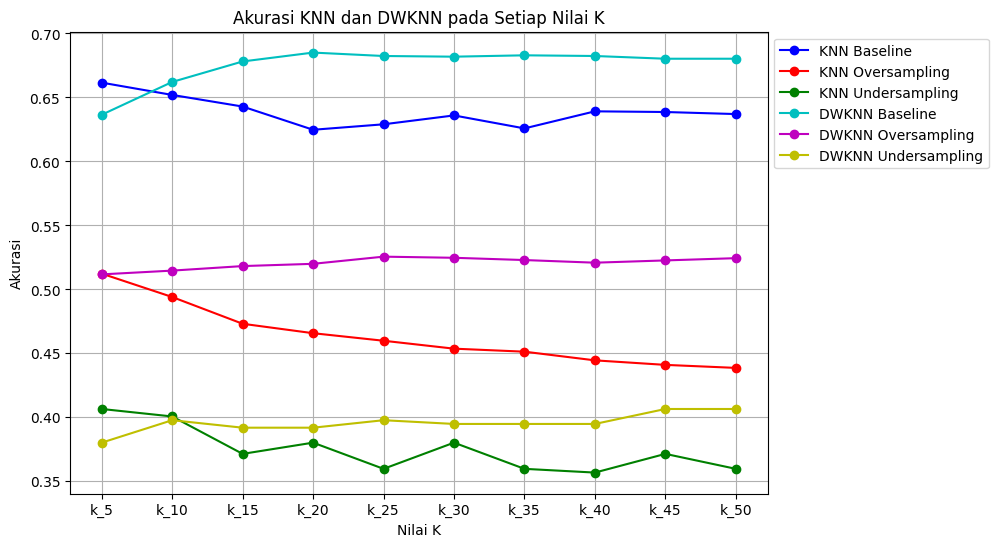

In [33]:
plt.figure(figsize=(9, 6))
plt.plot(df_knn_accuracy.columns, df_knn_accuracy.iloc[0], marker='o', linestyle='-', color='b', label='KNN Baseline')
plt.plot(df_knn_oversampling_accuracy.columns, df_knn_oversampling_accuracy.iloc[0], marker='o', linestyle='-', color='r', label='KNN Oversampling')
plt.plot(df_knn_undersampling_accuracy.columns, df_knn_undersampling_accuracy.iloc[0], marker='o', linestyle='-', color='g', label='KNN Undersampling')
plt.plot(df_dwknn_accuracy.columns, df_dwknn_accuracy.iloc[0], marker='o', linestyle='-', color='c', label='DWKNN Baseline')
plt.plot(df_dwknn_oversampling_accuracy.columns, df_dwknn_oversampling_accuracy.iloc[0], marker='o', linestyle='-', color='m', label='DWKNN Oversampling')
plt.plot(df_dwknn_undersampling_accuracy.columns, df_dwknn_undersampling_accuracy.iloc[0], marker='o', linestyle='-', color='y', label='DWKNN Undersampling')
plt.xlabel('Nilai K')
plt.ylabel('Akurasi')
plt.title('Akurasi KNN dan DWKNN pada Setiap Nilai K')
plt.legend(bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()